In [1]:
from scipy import sparse
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import psycopg2
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
x = sparse.load_npz('model/tf_idf.npz')

In [3]:
# First we are going to PCA this vector data 
reduced_data = PCA(n_components=2).fit_transform(x.todense())

km = KMeans(init='k-means++', n_clusters=15, n_init=10)
km.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
# step size of mesh
h = 0.05

x_min, x_max = reduced_data[:, 0].min(), reduced_data[:, 0].max() 
y_min, y_max = reduced_data[:, 1].min(), reduced_data[:, 1].max()

In [5]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [6]:
test_data = np.c_[xx.ravel(), yy.ravel()]
# test_data.shape
Z = km.predict(test_data)

In [7]:
Z = Z.reshape(xx.shape)


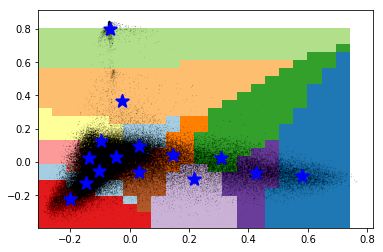

In [8]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=.05)

# Plot the centroids as an *
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='*', s=169, linewidths=2,
           color='b', zorder=10)

plt.show()